Recommendation System based on Weighted Rating , Content and Clustering Model for AirBnB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

file_id = '1PJThBkaga0LXg-ferYLYKREN4sF9UxyR'
gdrive_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
df = pd.read_csv(gdrive_url)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


### Dataset content :

1.  id: Unique identifier for each listing
2.  name: Name of the Airbnb listing
3.  rating: Average rating of the listing
4.   reviews: Number of reviews received
5.   host_name: Name of the host
6.   host_id: Unique identifier for the host
7.   address: Location of the listing (city, region, country)
8.  features: Summary of features (number of guests, bedrooms, beds, bathrooms)
9.  amenities: List of amenities provided
10. safety_rules
11. house_rules
12.  price: Price per month
13.  country: Country where the listing is located
14.  bathrooms: Number of bathrooms
15.  beds: Number of beds
16.  guests: Number of guests the listing can accommodate
17.  toilets: Number of toilets
18.  bedrooms: Number of bedrooms
19.  studios: Number of studio units
20.  checkin: Check-in time
21.  checkout: Check-out time


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [7]:
# Renaming the column
df.rename(columns={'hourse_rules': 'house_rules'}, inplace=True)
df.rename(columns={'toiles': 'toilets'}, inplace=True)

In [8]:
#replace new rating as 0
df['rating'] = df['rating'].replace('New', 0)

In [9]:
df['rating'] = df['rating'].astype(float)
df['reviews'] = df['reviews'].str.replace(',', '')
df['reviews'] = df['reviews'].astype(int)

In [10]:
# Remove leading and trailing whitespace in the 'country' column
df['country'] = df['country'].str.strip()

## Data Preprocessing

In [11]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'img_links', 'features', 'address']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

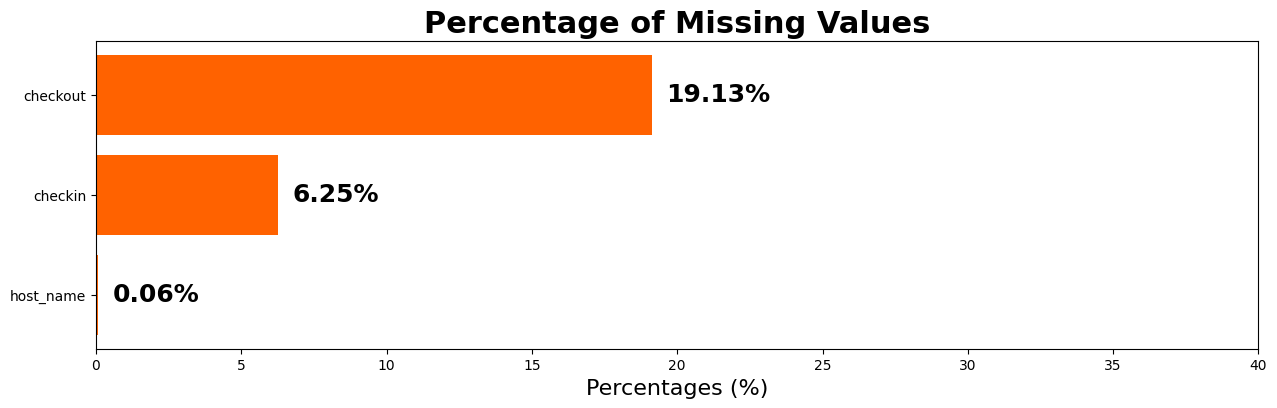

In [12]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [13]:
# Replace missing values in 'checkin' and 'checkout' columns with 'Not specified'
df['checkin'].fillna('Not specified', inplace=True)
df['checkout'].fillna('Not specified', inplace=True)

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 id              0
name            0
rating          0
reviews         0
host_name       8
host_id         0
amenities       0
safety_rules    0
house_rules     0
price           0
country         0
bathrooms       0
beds            0
guests          0
toilets         0
bedrooms        0
studios         0
checkin         0
checkout        0
dtype: int64


In [14]:
#create a copy after data cleaning
df_clean = df.copy()

In [15]:
#create price for one night
df['price_fix'] = df['price']/30
df['price_fix'] = df['price_fix'].round(2)

In [16]:
df = df.drop('price', axis=1)

In [17]:
# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 id              0
name            0
rating          0
reviews         0
host_name       8
host_id         0
amenities       0
safety_rules    0
house_rules     0
country         0
bathrooms       0
beds            0
guests          0
toilets         0
bedrooms        0
studios         0
checkin         0
checkout        0
price_fix       0
dtype: int64


In [18]:
df.head()

,id,name,rating,reviews,host_name,host_id,amenities,safety_rules,house_rules,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",Turkey,1,1,2,0,2,0,Flexible,12 00 pm,269.27
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,155.50
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,199.70
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,377.97
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,222.43


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12805 non-null  int64  
 1   name          12805 non-null  object 
 2   rating        12805 non-null  float64
 3   reviews       12805 non-null  int64  
 4   host_name     12797 non-null  object 
 5   host_id       12805 non-null  float64
 6   amenities     12805 non-null  object 
 7   safety_rules  12805 non-null  object 
 8   house_rules   12805 non-null  object 
 9   country       12805 non-null  object 
 10  bathrooms     12805 non-null  int64  
 11  beds          12805 non-null  int64  
 12  guests        12805 non-null  int64  
 13  toilets       12805 non-null  int64  
 14  bedrooms      12805 non-null  int64  
 15  studios       12805 non-null  int64  
 16  checkin       12805 non-null  object 
 17  checkout      12805 non-null  object 
 18  price_fix     12805 non-nu

In [24]:
df['rating'] = df['rating'].astype(int)


In [25]:
df.to_csv('airbnb_clean.csv')

## EDA

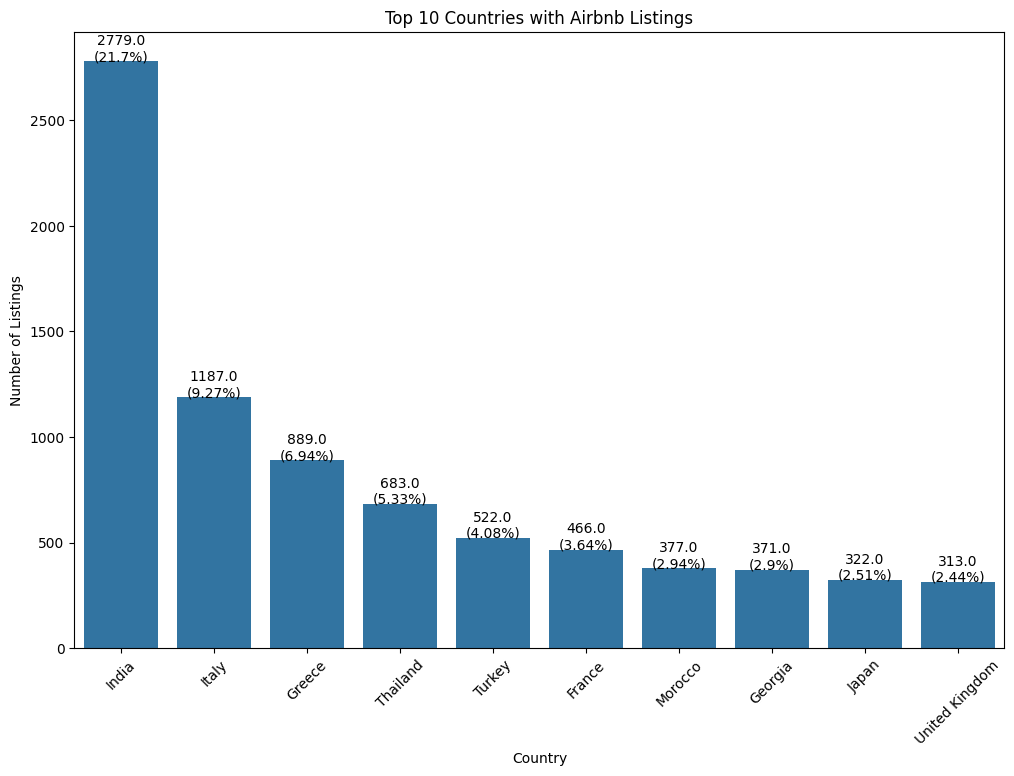

In [ ]:
top_countries = df['country'].value_counts().index[:10]
top_counts = df['country'].value_counts().loc[top_countries]
total_listings = df['country'].count()
top_percentages = (top_counts / total_listings * 100).round(2)

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='country', data=df, order=top_countries)

# Add labels and percentages to each bar
for p in ax.patches:
    country = p.get_x() + p.get_width() / 2
    count = p.get_height()
    percentage = top_percentages.loc[df['country'].value_counts().index[int(country)]]
    label = f'{count}\n({percentage}%)'
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # 9 points vertical offset
                textcoords='offset points')

plt.title('Top 10 Countries with Airbnb Listings')
plt.xlabel('Country')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

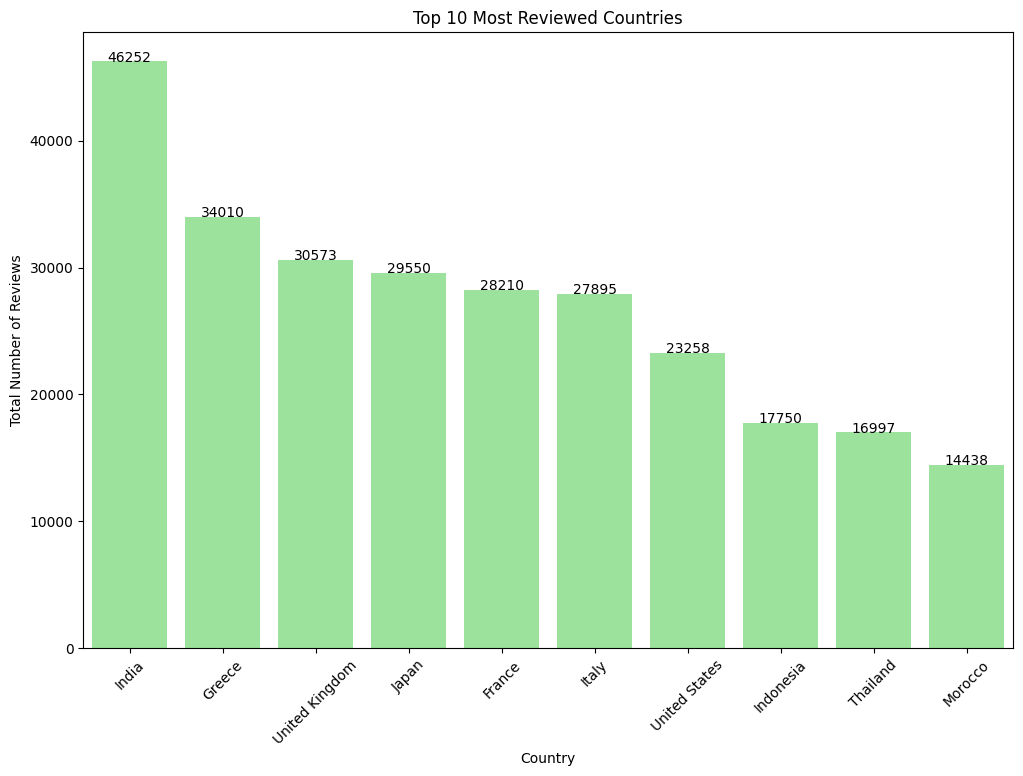

In [ ]:
# Calculate the total number of reviews for each country
country_review_counts = df.groupby('country')['reviews'].sum().sort_values(ascending=False)

# Get the top countries by total number of reviews
top_countries_by_reviews = country_review_counts.head(10)

# Create a bar chart for the most reviewed countries
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_countries_by_reviews.index, y=top_countries_by_reviews.values, color='lightgreen')

# Add labels on top of each bar
for i, v in enumerate(top_countries_by_reviews.values):
    ax.text(i, v + 5, str(v), color='black', ha='center')

plt.title('Top 10 Most Reviewed Countries')
plt.xlabel('Country')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

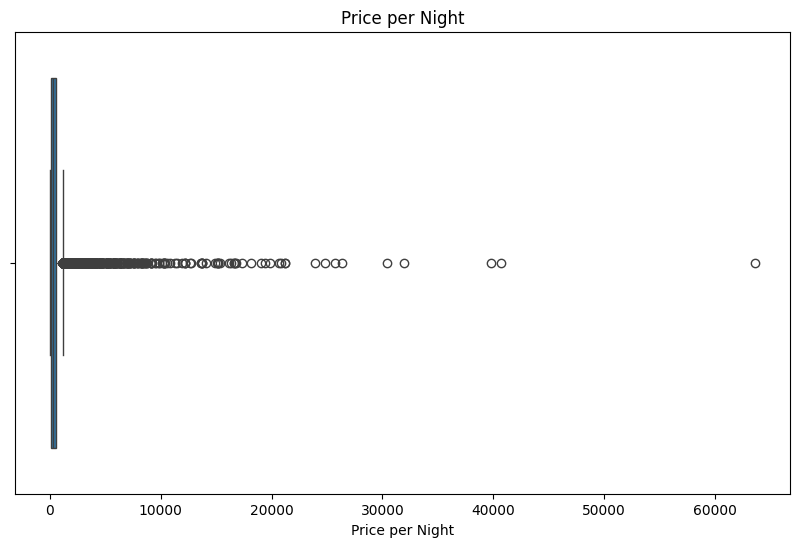

In [ ]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_fix'])
plt.title('Price per Night')
plt.xlabel('Price per Night')
plt.show()

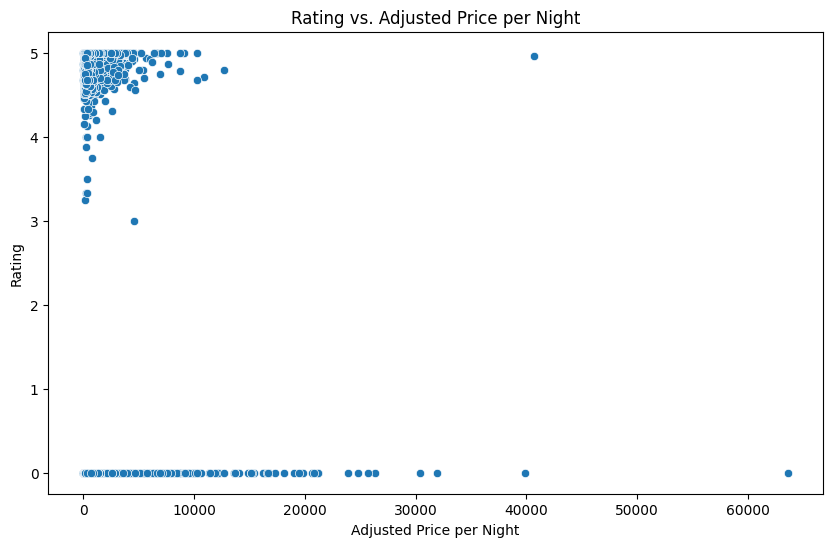

In [ ]:
# Create a scatter plot to show the relationship between rating and price_fix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_fix', y='rating', data=df)
plt.title('Rating vs. Adjusted Price per Night')
plt.xlabel('Adjusted Price per Night')
plt.ylabel('Rating')
plt.show()

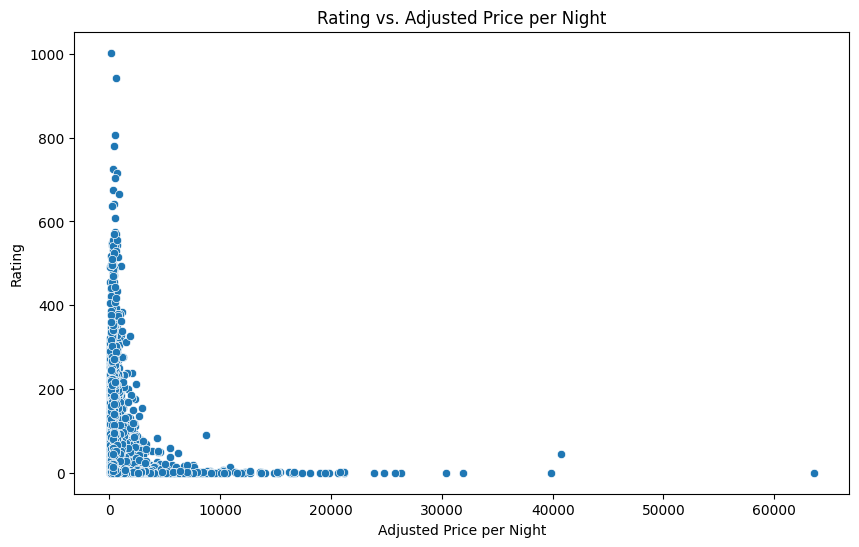

In [ ]:
# Create a scatter plot to show the relationship between rating and price_fix
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_fix', y='reviews', data=df)
plt.title('Rating vs. Adjusted Price per Night')
plt.xlabel('Adjusted Price per Night')
plt.ylabel('Rating')
plt.show()

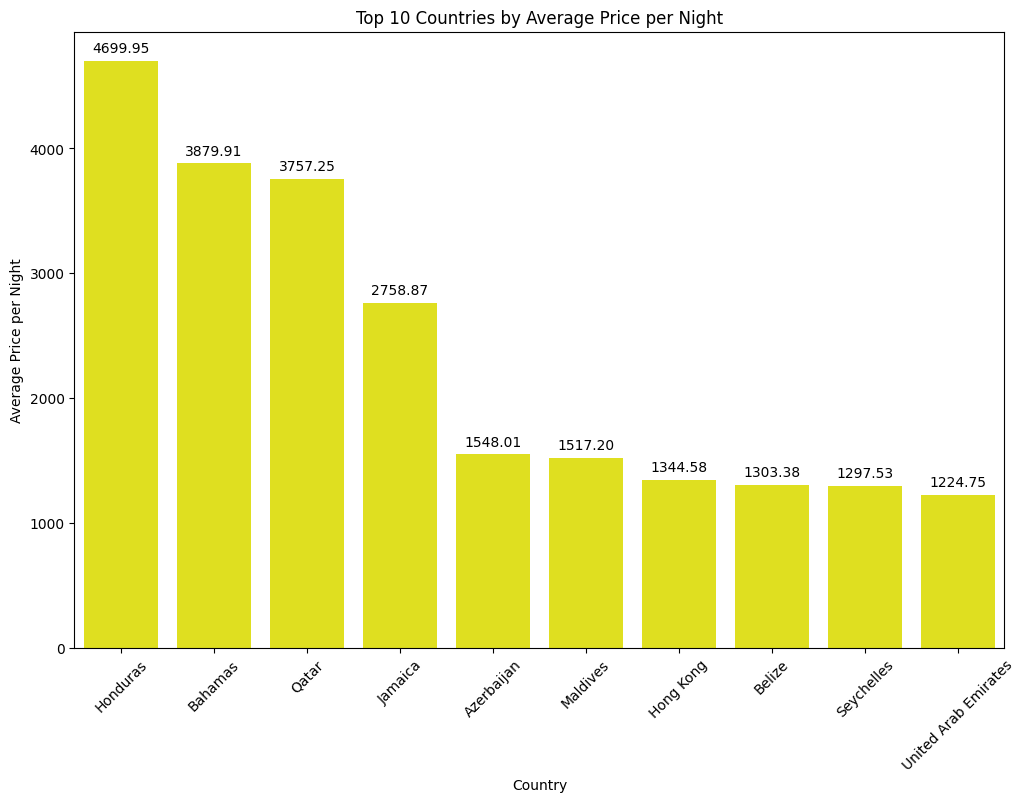

In [ ]:
# Calculate average price per night by country
avg_price_by_country = df.groupby('country')['price_fix'].median().sort_values(ascending=False)

# Get top 10 countries by average price
top_countries = avg_price_by_country.head(10).index

# Filter DataFrame to include only top 10 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Bar chart of average price per night by country (top 10 by average price)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=avg_price_by_country[top_countries].index, y=avg_price_by_country[top_countries].values, color='yellow')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # 9 points vertical offset
                textcoords='offset points',
                color='black')  # Label color

plt.title('Top 10 Countries by Average Price per Night')
plt.xlabel('Country')
plt.ylabel('Average Price per Night')
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-a1fdd71c46fc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='rating', y='country', data=top_countries, palette='viridis')


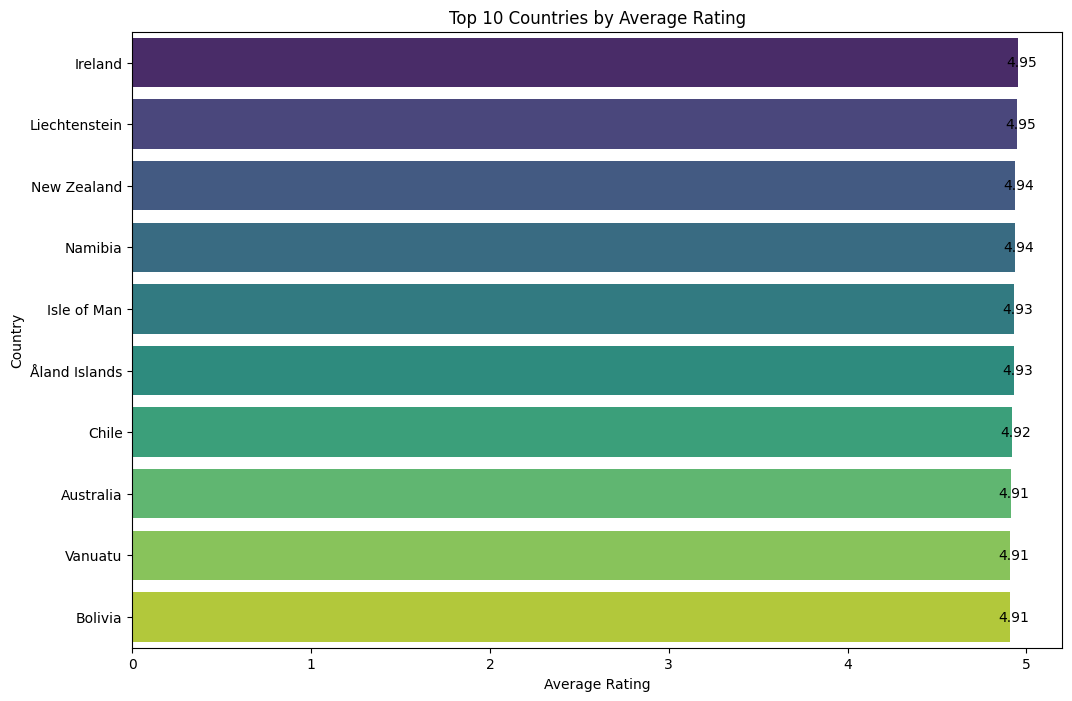

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and calculate the average rating
country_ratings = df.groupby('country')['rating'].mean().reset_index()

# Sort the countries by average rating in descending order
top_countries = country_ratings.sort_values(by='rating', ascending=False).head(10)

# Plot the top 10 countries with the highest average ratings
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='rating', y='country', data=top_countries, palette='viridis')

# Add labels to each bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', (width + 0.02, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Top 10 Countries by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.show()

In [ ]:
# Calculate average rating and total reviews for each listing
listing_avg_rating = df.groupby('name')['rating'].mean()
listing_total_reviews = df.groupby('name')['reviews'].sum()

# Combine into a single DataFrame and sort by total reviews
listing_summary = pd.DataFrame({
    'Average Rating': listing_avg_rating,
    'Total Reviews': listing_total_reviews
}).sort_values(by='Total Reviews', ascending=False)

# Get the top 10 listings by total reviews
top_10_listings = listing_summary.head(10)

# Filter the original DataFrame to include only top 10 listings
df_top_10_listings = df[df['name'].isin(top_10_listings.index)]

# Extract country, host name, and median price for top 10 listings
top_10_countries = df_top_10_listings.groupby('name')['country'].first()
top_10_host_names = df_top_10_listings.groupby('name')['host_name'].first()
top_10_prices = df_top_10_listings.groupby('name')['price_fix'].median()

# Combine all details into a final DataFrame
top_10_final_summary = pd.DataFrame({
    'Listing Name': top_10_listings.index,
    'Host Name': top_10_host_names.values,
    'Average Rating': top_10_listings['Average Rating'],
    'Total Reviews': top_10_listings['Total Reviews'],
    'Country': top_10_countries.values,
    'Median Price ($)': top_10_prices.values
}).reset_index(drop=True)

# Display the DataFrame
top_10_final_summary

,Listing Name,Host Name,Average Rating,Total Reviews,Country,Median Price ($)
0,Fossatún Camping Pods - Camping Pod,Teresa,4.78,1003,Italy,274.80
1,Nónsteinn -2- Enjoy life in the countryside.,Mr Bagus,4.99,943,Indonesia,429.80
2,Lumbar Pearl / Ocean Pearl,Trevor,4.93,807,United States,369.03
3,Domeland: Off-grid Adobe Dome near Big Bend,Serg,4.95,780,United States,814.70
4,Guesthouse Hof í Vatnsdal,Steinar Berg,4.51,726,Iceland,133.77
5,Treehouse at Danville,Eline Manon,4.92,716,Iceland,299.83
6,Taos Mesa Studio Earthship,Gréta,4.91,703,Iceland,514.83
7,Apartment in the heart of Florence,Anna And Óli,4.90,675,Iceland,605.70
8,Dream Art Studio in the Gunks,Dan,4.89,665,United States,516.83
9,Beautiful villa on the edge of BLUE LAGOON,Dan And Deborah,4.84,642,United States,703.00


<ipython-input-28-c2f43deaee76>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Reviews', y='Listing Name', data=top_10_final_summary, palette='viridis', ax=ax1)


<Figure size 1400x800 with 0 Axes>

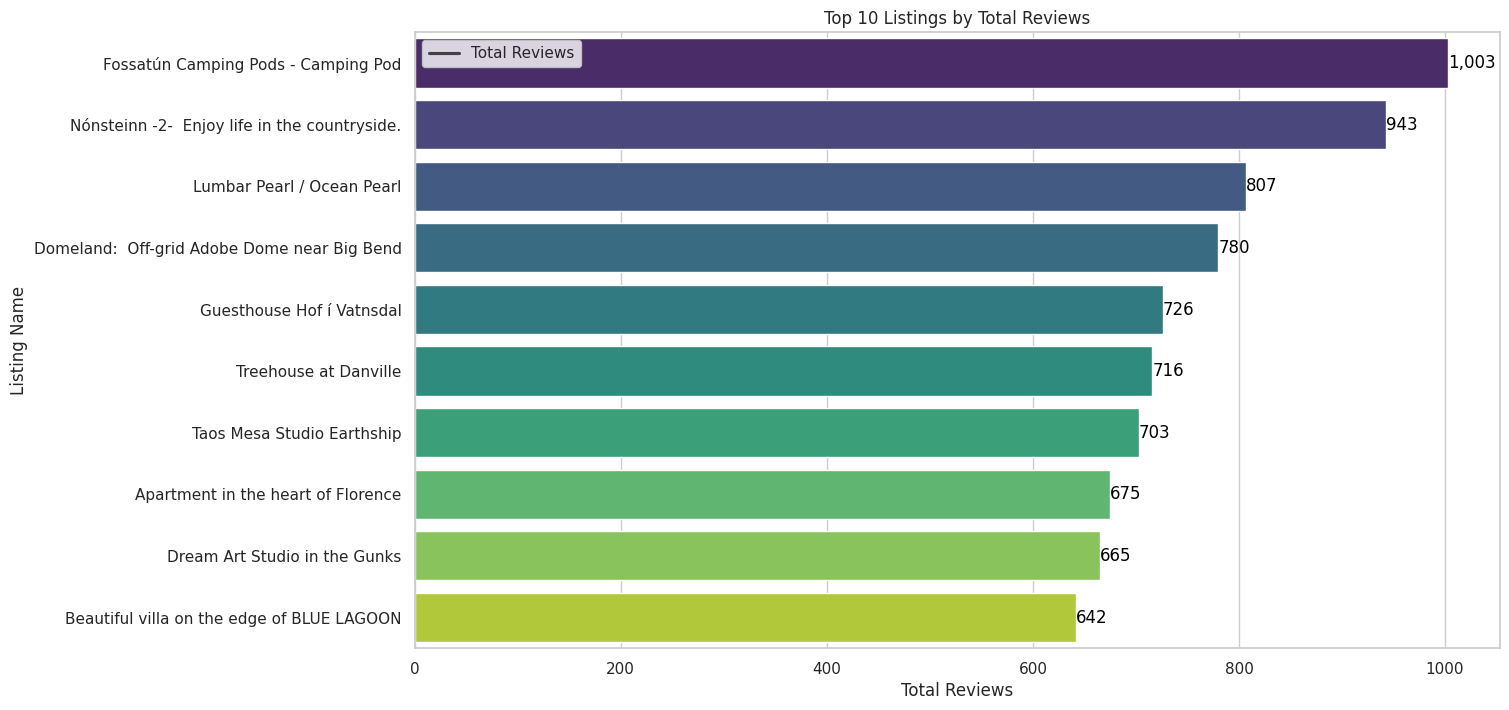

In [ ]:
# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a new figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Horizontal bar plot
sns.barplot(x='Total Reviews', y='Listing Name', data=top_10_final_summary, palette='viridis', ax=ax1)

# Adding labels and titles
ax1.set_title('Top 10 Listings by Total Reviews')
ax1.set_xlabel('Total Reviews')
ax1.set_ylabel('Listing Name')

# Adding labels to each bar
for index, value in enumerate(top_10_final_summary['Total Reviews']):
    ax1.text(value, index, f'{value:,}', va='center', ha='left', color='black')

# Adding a legend
ax1.legend(['Total Reviews'], loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Filter out listings with rating <= 0 or reviews <= 0
filtered_df = df[(df['rating'] > 0) & (df['reviews'] > 0)]

# Sort by price in descending order
sorted_df = filtered_df.sort_values(by='price_fix', ascending=False)

# Select the top 10 listings
top_10_price_listings = sorted_df[['name', 'price_fix', 'rating', 'reviews', 'country']].head(10)

# Reset index for better readability
top_10_price_listings = top_10_price_listings.reset_index(drop=True)

# Display the DataFrame with the top 10 listings
top_10_price_listings

,name,price_fix,rating,reviews,country
0,Romantic hideaway in the middle of the Mols Mo...,40719.17,4.96,45,Denmark
1,"NEW: LUXURY CHALET MERIBEL, 16 people",12683.80,4.80,5,France
2,Sky Floor- Two bedroom Burj Khalifa View,10858.73,4.71,14,United Arab Emirates
3,Kaggeholm Castle - Rent your own castle,10268.60,4.67,6,Sweden
4,"Sea View,Pool, Padel Tennis, Tavern, Heli Pad",10267.83,5.00,3,Greece
5,"Luxury Round Cay in Cayos Cochinos, Bay Islands",9103.10,5.00,3,Honduras
6,pure house life,8763.27,5.00,3,Israel
7,Invisible House Joshua Tree - Skyscraper with ...,8699.07,4.78,91,United States
8,"THE ""WAOUHH ""EFFECT ! 760m2, swimming pool 10...",7605.90,4.86,14,France
9,250 qm penthouse with roof terrace for photoshoot,7549.87,5.00,19,Germany


<ipython-input-30-1d53f17c9133>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price_fix', y='name', data=top_10_price_listings, palette='viridis')


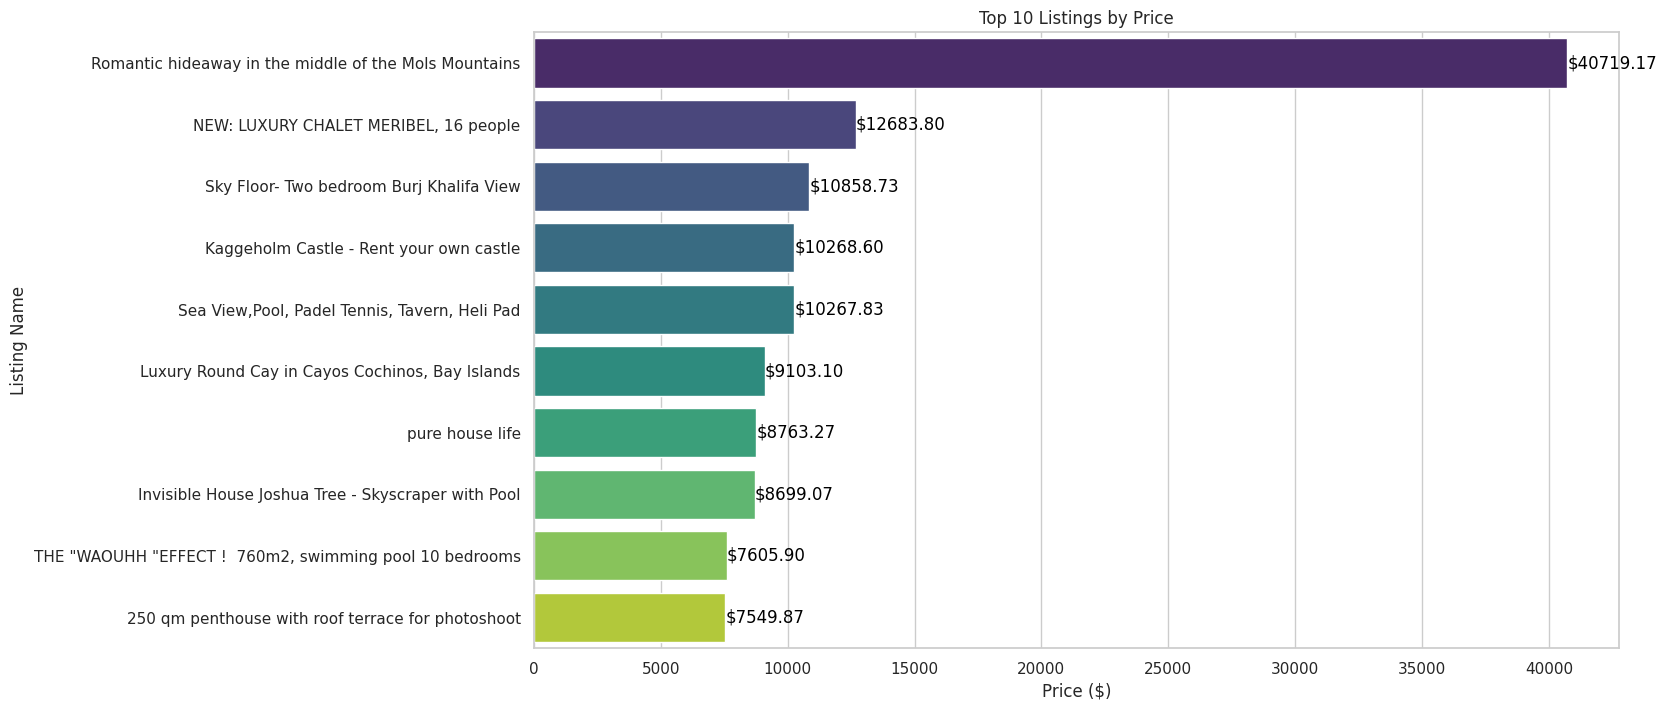

In [ ]:


# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a horizontal bar plot for price
ax = sns.barplot(x='price_fix', y='name', data=top_10_price_listings, palette='viridis')

# Add labels and title
plt.title('Top 10 Listings by Price')
plt.xlabel('Price ($)')
plt.ylabel('Listing Name')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='${:.2f}', label_type='edge', color='black')

# Show the plot
plt.show()

In [ ]:
# Calculate average rating and total reviews for each listing
host_avg_rating = df.groupby('host_name')['rating'].mean()
host_total_reviews = df.groupby('host_name')['reviews'].sum()

# Combine into a single DataFrame and sort by total reviews
host_summary = pd.DataFrame({
    'Average Rating': host_avg_rating,
    'Total Reviews': host_total_reviews
}).sort_values(by='Total Reviews', ascending=False)

# Get the top 10 listings by total reviews
top_10_host = host_summary.head(10)

# Filter the original DataFrame to include only top 10 listings
df_top_10_host = df[df['host_name'].isin(top_10_host.index)]

# Extract country and price for top 10 listings
top_10_countries = df_top_10_host.groupby('host_name')['country'].first()
top_10_prices = df_top_10_host.groupby('host_name')['price_fix'].first()

# Combine all details into a final DataFrame
top_10_final_summary = pd.DataFrame({
    'Host Name': top_10_host_names.values,
    'Average Rating': top_10_host['Average Rating'],
    'Total Reviews': top_10_host['Total Reviews'],
    'Country': top_10_countries.values,
    'Median Price ($)': top_10_prices.values
}).reset_index(drop=True)

# Display the DataFrame
top_10_final_summary

,Host Name,Average Rating,Total Reviews,Country,Median Price ($)
0,Teresa,3.640000,1935,New Zealand,393.13
1,Mr Bagus,3.869394,1861,Iceland,853.77
2,Trevor,4.328824,1675,United Arab Emirates,273.83
3,Serg,3.866154,1609,Germany,242.03
4,Steinar Berg,3.986364,1551,United States,425.47
5,Eline Manon,4.621905,1452,Philippines,183.63
6,Gréta,4.376000,1435,South Korea,274.00
7,Anna And Óli,4.276875,1407,Finland,357.37
8,Dan,4.854000,1350,Norway,545.23
9,Dan And Deborah,4.858750,1262,Germany,213.63


<ipython-input-32-1a1e47fc146f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Host Name', y='Total Reviews', data=top_10_final_summary, palette='viridis', ax=ax1)


<Figure size 1400x800 with 0 Axes>

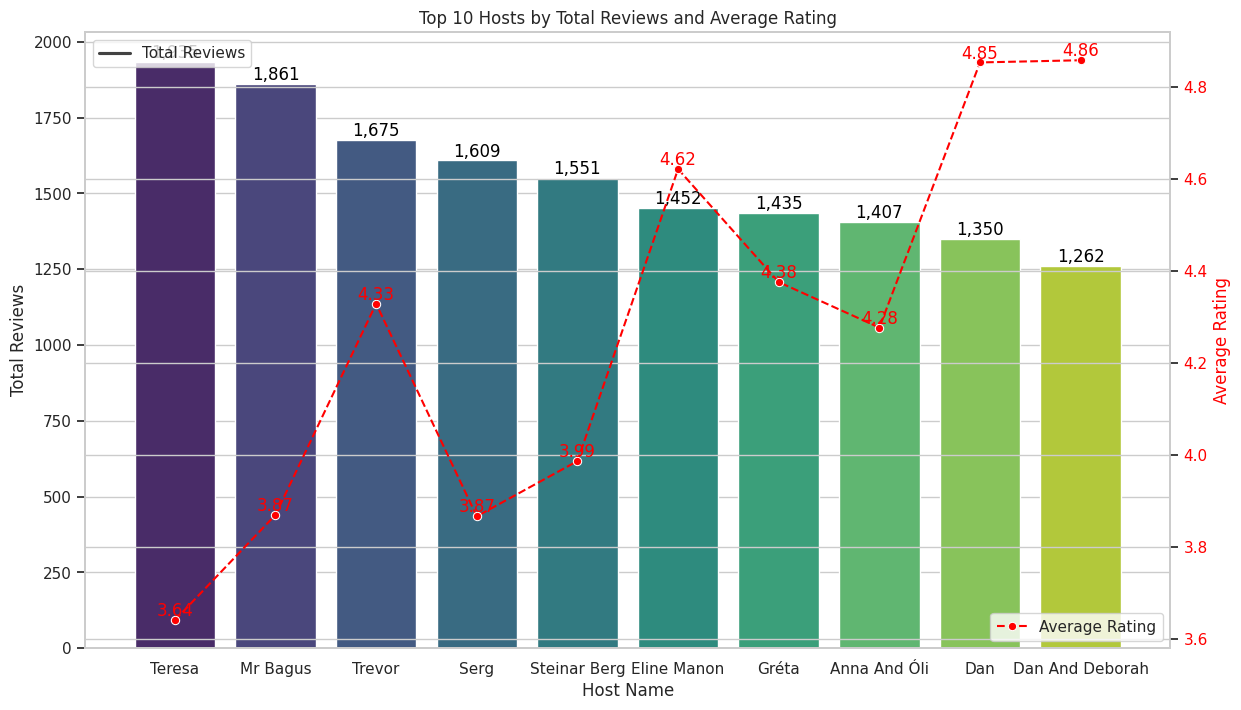

In [ ]:
# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a new figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vertical bar plot for Total Reviews
sns.barplot(x='Host Name', y='Total Reviews', data=top_10_final_summary, palette='viridis', ax=ax1)
ax1.set_title('Top 10 Hosts by Total Reviews and Average Rating')
ax1.set_xlabel('Host Name')
ax1.set_ylabel('Total Reviews')

# Adding labels to each bar
for index, value in enumerate(top_10_final_summary['Total Reviews']):
    ax1.text(index, value, f'{value:,}', va='bottom', ha='center', color='black')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()
lineplot = sns.lineplot(x='Host Name', y='Average Rating', data=top_10_final_summary, color='red', marker='o', ax=ax2, linestyle='--', label='Average Rating')
ax2.set_ylabel('Average Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels to each point on the line plot
for index, value in enumerate(top_10_final_summary['Average Rating']):
    ax2.text(index, value, f'{value:.2f}', va='bottom', ha='center', color='red')

# Adding labels and legends
ax1.legend(['Total Reviews'], loc='upper left')
ax2.legend(loc='lower right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## Weighted Rating Recommendation System

In [26]:
# Calculate C (mean rating across all listings)
C = df['rating'].mean()

# Calculate m (minimum number of reviews required to be listed)
m = df['reviews'].quantile(0.9)

In [27]:
# Filter listings that qualify (have reviews >= m)
q_listings = df.copy().loc[df['reviews'] >= m]
print(q_listings.shape)

(1284, 19)


In [28]:
# Define the weighted rating function
def weighted_rating(x, m=m, C=C):
    v = x['reviews']
    R = x['rating']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [29]:
# Calculate the score for qualified listings
q_listings['score'] = q_listings.apply(weighted_rating, axis=1)

In [30]:
# Sort listings by score
q_listings = q_listings.sort_values('score', ascending=False)

In [ ]:
# Filter the DataFrame for rows where the country is 'United States'
us_listings = df[df['country'] == 'United States']

# Find the minimum price in the filtered DataFrame
min_price_fix_in_us = us_listings['price_fix'].min()

print(f"The lowest price_fix in the United States is: {min_price_fix_in_us}")

The lowest price_fix in the United States is: 104.03


In [ ]:
# Filter listings by country and price range
filtered_listings = q_listings[(q_listings['country'] == 'United States') & (q_listings['price_fix'] <= 300)]


In [ ]:
top_listings = filtered_listings[['name', 'reviews', 'rating', 'score', 'price_fix', 'country']].head(10)
top_listings

,name,reviews,rating,score,price_fix,country
10807,"2nd Floor King Bed, Edradour N.E. Bend",638,4.99,4.746094,224.53,United States
10835,Sleep in PIQUE Art Gallery!,496,4.90,4.613969,249.83,United States
1363,Hobbit Cottage,370,4.96,4.584771,249.73,United States
1422,✨ The Hobbit House,532,4.84,4.579971,285.70,United States
1497,Treehouse Canopy Room: Permaculture Farm,549,4.80,4.553111,200.03,United States
1511,Stargazing Hut - Mossy Forest Glamping,231,4.96,4.429080,258.40,United States
1473,Cozy Hobbit House on charming Bainbridge Island,219,4.95,4.402575,229.90,United States
1516,The Bunkhouse at Love's Hideaway,127,4.94,4.179055,213.27,United States


## Content Based Filtering

In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['amenities', 'country']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['amenities']) + ' ' + x['country']
df['soup'] = df.apply(create_soup, axis=1)

In [ ]:
df['soup']

0        m o u n t a i n v i e w , v a l l e y v i e w ...
1        k i t c h e n , w i f i , d e d i c a t e d w ...
2        m o u n t a i n v i e w , k i t c h e n , w i ...
3        m o u n t a i n v i e w , v a l l e y v i e w ...
4        k i t c h e n , w i f i , f r e e p a r k i n ...
                               ...                        
12800    k i t c h e n , w i f i , f r e e p a r k i n ...
12801    w i f i , f r e e o n - s t r e e t p a r k i ...
12802    w i f i , b r e a k f a s t , l o n g - t e r ...
12803    k i t c h e n , w i f i , d e d i c a t e d w ...
12804    s e a v i e w , b e a c h a c c e s s – b e a ...
Name: soup, Length: 12805, dtype: object

In [ ]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

In [ ]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['name'])

In [ ]:
def get_recommendations(names, cosine_sim=cosine_sim):
    recommendations = pd.DataFrame()
    for name in names:
        if name in indices.index:
            # Get the index of the listing that matches the name
            idx = indices[name]

            # Get the pairwise similarity scores of all listings with that listing
            sim_scores = list(enumerate(cosine_sim[idx]))

            # Sort the listings based on the similarity scores
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Get the scores of the top 10 most similar listings
            sim_scores = sim_scores[1:11]

            # Get the listing indices
            listing_indices = [i[0] for i in sim_scores]

            # Retrieve the relevant listings with their details
            recommended_listings = df.iloc[listing_indices][['name', 'rating', 'amenities','country']]

            ##recommended_listings = recommended_listings[(recommended_listings['rating'] > 0) & (recommended_listings['country'] == country_filter)]

            #Filter out listings with a rating of zero
            recommended_listings = recommended_listings[(recommended_listings['rating'] > 0)]

            return recommended_listings

In [ ]:
#create sample as user bookings history
n = 10

# Randomly select n rows from df to create df_sample
df_sample = df.sample(n=n, random_state=None).copy()

df_sample

,id,name,rating,reviews,host_name,host_id,amenities,safety_rules,house_rules,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix,soup
2421,614835426389014314,Kucica Omorika,0.00,0,Marijana,456419534.0,"mountainview,lakeview,beachaccess,kitchen,wifi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 10:00 am,Se...",serbia,1,5,5,0,1,0,After 2 00 pm,10 00 am,456.03,"m o u n t a i n v i e w , l a k e v i e w , b ..."
7164,42134646,SAKAS RESIDENCES DOUBLE ROOM SEA VIEW,4.88,43,Stelios,333740044.0,"wifi,freeparkingonpremises,pool,petsallowed,tv...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",greece,1,1,2,0,1,0,3 00 pm - 10 00 pm,12 00 pm,363.43,"w i f i , f r e e p a r k i n g o n p r e m i ..."
7573,18533625,Single Bedroom Studio Apartment,4.83,96,Suhelika,49759702.0,"kitchen,freeparkingonpremises,petsallowed,tvwi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 12:00 pm,Check out: 11:00 am,P...",india,1,1,3,0,1,0,After 12 00 pm,11 00 am,95.10,"k i t c h e n , f r e e p a r k i n g o n p r ..."
702,4569254,i THE CHILL-OUT HOUSE 2BHK (fast wifi) by Lorenzo,4.68,102,Lourenco,17863251.0,"publicorsharedbeachaccess,kitchen,wifi,dedicat...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 8:00 pm,Check out: 11:00 a...",india,1,2,5,0,2,0,3 00 pm - 8 00 pm,11 00 am,57.73,p u b l i c o r s h a r e d b e a c h a c c e ...
6633,678668486425650723,Amazing 2BHK Apartment @ prime location..!!!,0.00,0,Akhil,197434284.0,"kitchen,wifi,freeparkingonpremises,tv,long-ter...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",Check-in: After 3:00 pm,india,2,2,6,0,2,0,After 3 00 pm,Not specified,190.20,"k i t c h e n , w i f i , f r e e p a r k i n ..."
3527,25313597,Trulli Capperi,0.00,0,Dino,27582454.0,"petsallowed,tv,washingmachine,airconditioning,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 12:00 am,Check out: 10:00 ...",italy,1,1,4,0,0,0,3 00 pm - 12 00 am,10 00 am,605.70,"p e t s a l l o w e d , t v , w a s h i n g m ..."
803,22348529,"VILLA PRAIA (Cavelossim, Goa)",4.89,36,Lourio,70735744.0,"gardenview,oceanview,beachaccess–beachfront,ki...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Self check-in with lockbox,...",india,2,3,6,0,3,0,Flexible,Not specified,209.23,"g a r d e n v i e w , o c e a n v i e w , b e ..."
5683,46784899,Velavaru island overwater poll villa AI,0.00,0,Rafik,17999618.0,"wifi,pool,tv,airconditioning,hairdryer,breakfa...","󹀁,Airbnb's COVID-19 safety practices apply,Car...",Check-in: 2:00 pm - 12:00 am,maldives,1,1,2,0,1,0,2 00 pm - 12 00 am,Not specified,1766.67,"w i f i , p o o l , t v , a i r c o n d i t i ..."
12510,41358569,Molly Luxury Private Pool Bungalow @ Pantai Ce...,5.00,14,Mark,73953397.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,Check out: 12:00 pm,No...",malaysia,2,4,7,0,3,0,After 3 00 pm,12 00 pm,1102.37,"k i t c h e n , w i f i , d e d i c a t e d w ..."
10691,52615319,Ancient Music Studio Heidelberg,0.00,0,Cora,158299020.0,"freeparkingonpremises,petsallowed,aircondition...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 3:00 pm - 8:00 pm,Pets are allowed",germany,1,3,4,0,2,0,3 00 pm - 8 00 pm,Not specified,449.97,"f r e e p a r k i n g o n p r e m i s e s , p ..."


In [ ]:
df_sample['country'].value_counts()


country
india       4
serbia      1
greece      1
italy       1
maldives    1
malaysia    1
germany     1
Name: count, dtype: int64

In [ ]:
# Example usage
recommendation_list = df_sample['name'].tolist()
recommendations = get_recommendations(recommendation_list)
recommendations

,name,rating,amenities,country
255,Tara Chalet,5.00,"kitchen,wifi,freeparkingonpremises,petsallowed...",serbia
276,"Chalet ""The Sound of Silence"" - Beocin village",5.00,"courtyardview,gardenview,kitchen,fastwifi–53mb...",serbia
1311,Barrels on the Vlasina lake,4.77,"lakeview,mountainview,beachaccess–beachfront,d...",serbia
2380,Delightful 1-bedroom houseboat on lake Perucac,4.78,"lakeview,mountainview,beachaccess,kitchen,wifi...",serbia
2381,Raft Drina,5.00,"lakeview,kitchen,wifi,freeparkingonpremises,pe...",serbia
2384,ArkaBarka Floating Rooms and Apartments - KIn...,4.56,"kitchen,wifi,dedicatedworkspace,freeon-streetp...",serbia
2391,Beach House Belgrade,4.95,"beachaccess–beachfront,kitchen,wifi,dedicatedw...",serbia
2394,Peace on the river,4.95,"waterfront,kitchen,wifi,freeparkingonpremises,...",serbia


## FEATURE ENGINEERING FOR CLUSTERING

In [ ]:
df_1 = df.copy()

In [ ]:
df.head(10)

,id,name,rating,reviews,host_name,host_id,amenities,safety_rules,house_rules,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix,soup
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"mountainview,valleyview,lakeaccess,kitchen,wif...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",turkey,1,1,2,0,2,0,Flexible,12 00 pm,269.27,"m o u n t a i n v i e w , v a l l e y v i e w ..."
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am,155.50,"k i t c h e n , w i f i , d e d i c a t e d w ..."
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"mountainview,kitchen,wifi,dedicatedworkspace,f...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm,199.70,"m o u n t a i n v i e w , k i t c h e n , w i ..."
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"mountainview,valleyview,kitchen,wifi,freeparki...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm,377.97,"m o u n t a i n v i e w , v a l l e y v i e w ..."
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"kitchen,wifi,freeparkingonpremises,tv,aircondi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm,222.43,"k i t c h e n , w i f i , f r e e p a r k i n ..."
5,48650769,CasaMia White Suite Treehouse,0.00,0,Casamia,261290482.0,"lakeview,mountainview,waterfront,wifi,dedicate...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,2,2,0,1,0,After 2 00 pm,12 00 pm,490.97,"l a k e v i e w , m o u n t a i n v i e w , w ..."
6,50765985,Ladin Bungalow,0.00,0,Stephen,15084529.0,"gardenview,mountainview,kitchen,wifi,dedicated...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,Check out: 11:00 am,No...",turkey,1,1,2,0,1,0,After 3 00 pm,11 00 am,410.40,"g a r d e n v i e w , m o u n t a i n v i e w ..."
7,40947216,Lavender House,0.00,0,Caner,318794897.0,"wifi,dedicatedworkspace,freeparkingonpremises,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: Flexible,Self check-in with building...",turkey,1,2,8,0,1,0,Flexible,Not specified,455.17,"w i f i , d e d i c a t e d w o r k s p a c e ..."
8,34043569,Prince's,0.00,0,Tu,221057563.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 11:00 am,Se...",vietnam,1,1,2,0,1,0,After 1 00 pm,11 00 am,58.23,"k i t c h e n , w i f i , d e d i c a t e d w ..."
9,42075682,"The Cottage, Private Pool Villa",4.67,3,Sukanya,173126583.0,"kitchen,wifi,freeparkingonpremises,privatepool...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 3:00 pm,No smoking,No pets",thailand,3,6,10,0,4,0,After 3 00 pm,Not specified,1016.20,"k i t c h e n , w i f i , f r e e p a r k i n ..."


#Encoding checkin and checkout time

In [ ]:
df['checkin'].unique()

array([' Flexible', ' 4 00 pm - 11 00 pm', ' After 1 00 pm',
       ' After 2 00 pm', ' After 3 00 pm', ' 3 00 pm - 9 00 pm',
       ' 1 00 pm - 11 00 pm', ' 2 00 pm - 4 00 pm', ' 2 00 pm - 8 00 pm',
       ' 2 00 pm - 7 00 pm', ' 2 00 pm - 9 00 pm', ' After 11 00 am',
       ' 4 00 pm - 6 00 pm', ' 3 00 pm - 8 00 pm', ' 12 00 pm - 2 00 pm',
       ' 2 00 pm - 2 00 am', 'Not specified', ' 2 00 pm - 12 00 am',
       ' 2 00 pm - 10 00 pm', ' After 4 00 pm', ' 4 00 pm - 12 00 am',
       ' 2 00 pm - 11 00 pm', ' 11 00 am - 5 00 pm', ' 1 00 pm - 6 00 pm',
       ' After 12 00 pm', ' 1 00 pm - 7 00 pm', ' 10 00 am - 12 00 pm',
       ' 2 00 pm - 6 00 pm', ' 11 00 am - 2 00 pm', ' 3 00 pm - 7 00 pm',
       ' 11 00 am - 12 00 am', ' 1 00 pm - 3 00 pm', ' 1 00 pm - 9 00 pm',
       ' 3 00 pm - 10 00 pm', ' 11 00 am - 3 00 pm', ' 4 00 pm - 9 00 pm',
       ' 1 00 pm - 4 00 pm', ' 3 00 pm - 6 00 pm', ' 3 00 pm - 12 00 am',
       ' 4 00 pm - 8 00 pm', ' 3 00 pm - 11 00 pm', ' 1 00 pm - 12 00 a

In [ ]:
import pandas as pd
import re


# Define a function to categorize check-in times
def categorize_checkin_time(time_str):
    time_str = time_str.strip()

    if time_str == 'Flexible':
        return 'Flexible'
    elif time_str == 'Not specified':
        return 'Not specified'

    # Extract hour from the time string
    match = re.search(r'(\d{1,2})\s*(am|pm)', time_str)
    if match:
        hour, period = int(match.group(1)), match.group(2)
        if period == 'pm' and hour != 12:
            hour += 12
        elif period == 'am' and hour == 12:
            hour = 0

        if hour < 9:
            return 'Early Morning'
        elif 9 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 15:
            return 'Early Afternoon'
        elif 15 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 21:
            return 'Evening'
        else:
            return 'Late Evening/Night'
    return 'Other'

# Apply the categorization function
df['checkin'] = df['checkin'].apply(categorize_checkin_time)


In [ ]:
df['checkout'].unique()

array([' 12 00 pm', ' 10 00 am', ' 11 00 am', 'Not specified', ' 3 00 pm',
       ' 1 00 pm', ' 12 00 am', ' 6 00 pm', ' 4 00 pm', ' 5 00 pm',
       ' 9 00 am', ' 2 00 pm', ' 8 00 am', ' 7 00 am', ' 1 00 am',
       ' 2 00 am', ' 11 00 pm', ' 10 00 pm', ' 3 00 am', ' 8 00 pm',
       ' 7 00 pm', ' 4 00 am'], dtype=object)

In [ ]:

# Define a function to categorize check-in times
def categorize_checkout_time(time_str):
    time_str = time_str.strip()

    if time_str == 'Not specified':
        return 'Not specified'

    # Extract hour and period (AM/PM) from the time string
    match = re.search(r'(\d{1,2})\s*(am|pm)', time_str)
    if match:
        hour, period = int(match.group(1)), match.group(2)
        if period == 'pm' and hour != 12:
            hour += 12
        elif period == 'am' and hour == 12:
            hour = 0

        # Categorize based on hour
        if hour < 9:
            return 'Early Morning'
        elif 9 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Late Evening/Night'
    return 'Other'

# Apply the categorization function
df['checkout'] = df['checkout'].apply(categorize_checkin_time)

In [ ]:
#final result of new group of check out time
df['checkout'].unique()

array(['Early Afternoon', 'Early Morning', 'Not specified'], dtype=object)

In [ ]:
#final result of new group of check in time
df['checkin'].unique()

array(['Flexible', 'Early Afternoon', 'Early Morning', 'Not specified'],
      dtype=object)

In [ ]:
#encoding checkin and checkout time
checkin_encoding = {
    'Not specified': 0,
    'Early Morning': 1,
    'Early Afternoon': 2,
    'Flexible': 3,

}

checkout_encoding = {
    'Not specified': 0,
    'Early Morning': 1,
    'Early Afternoon': 2,
}

# Apply label encoding to the checkin and checkout columns
df['checkin'] = df['checkin'].map(checkin_encoding)
df['checkout'] = df['checkout'].map(checkout_encoding)

In [ ]:
df_amenities = df.copy()

In [ ]:
df = df_amenities

In [ ]:
df.head()

,id,name,rating,reviews,host_name,host_id,amenities,safety_rules,house_rules,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix,soup
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"mountainview,valleyview,lakeaccess,kitchen,wif...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",turkey,1,1,2,0,2,0,3,2,269.27,"m o u n t a i n v i e w , v a l l e y v i e w ..."
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",turkey,2,2,4,0,2,0,2,1,155.50,"k i t c h e n , w i f i , d e d i c a t e d w ..."
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"mountainview,kitchen,wifi,dedicatedworkspace,f...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",georgia,1,3,4,0,1,0,2,2,199.70,"m o u n t a i n v i e w , k i t c h e n , w i ..."
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"mountainview,valleyview,kitchen,wifi,freeparki...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,2,4,0,1,0,2,2,377.97,"m o u n t a i n v i e w , v a l l e y v i e w ..."
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"kitchen,wifi,freeparkingonpremises,tv,aircondi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,1,2,0,1,0,2,2,222.43,"k i t c h e n , w i f i , f r e e p a r k i n ..."


In [ ]:
df['amenities'].unique()

array(['mountainview,valleyview,lakeaccess,kitchen,wifi,freeparkingonpremises,petsallowed,tv,unavailable:carbonmonoxidealarmcarbonmonoxidealarm,unavailable:smokealarmsmokealarm',
       'kitchen,wifi,dedicatedworkspace,freeparkingonpremises,privatepool,privatehottub,tv,washingmachine,unavailable:carbonmonoxidealarmcarbonmonoxidealarm,unavailable:smokealarmsmokealarm',
       'mountainview,kitchen,wifi,dedicatedworkspace,freedrivewayparkingonpremises,petsallowed,40"hdtvwithcable/satellitetv,lift,unavailable:carbonmonoxidealarmcarbonmonoxidealarm,unavailable:smokealarmsmokealarm',
       ...,
       'kitchen,wifi,freeparkingonpremises,privatepool,petsallowed,tvwithstandardcable/satellite,airconditioning,privatepatioorbalcony,garden,unavailable:carbonmonoxidealarmcarbonmonoxidealarm',
       'kitchen,wifi,dedicatedworkspace,freeparkingonpremises,privatepool,washingmachine,airconditioning,breakfast,unavailable:carbonmonoxidealarmcarbonmonoxidealarm,unavailable:smokealarmsmokealarm',
      

## Encoding Amenities

In [ ]:
# Define simplified amenity groups with separate view types
simplified_amenities = {
    'Mountain view': ['mountainview'],
    'Valley view': ['valleyview'],
    'Lake access': ['lakeaccess'],
    'Sea view': ['seaview'],
    'Kitchen': ['kitchen'],
    'Wifi': ['wifi'],
    'Parking': ['freeparkingonpremises', 'freedrivewayparkingonpremises'],
    'Pets': ['petsallowed'],
    'Television': ['tv', '40"hdtvwithcable/satellitetv', 'tvwithstandardcable/satellite'],
    'Workspace': ['dedicatedworkspace'],
    'Pool': ['privatepool'],
    'Hot tub': ['privatehottub'],
    'Washer': ['washingmachine', 'freewasher–inbuilding'],
    'Air conditioning': ['airconditioning'],
    'Security': ['securitycamerasonproperty'],
    'Smoke alarm': ['Unavailable:smokealarmsmokealarm'],
    'Carbon monoxide alarm': ['unavailable:carbonmonoxidealarmcarbonmonoxidealarm'],
    'Garden': ['garden'],
    'Patio': ['privatepatioorbalcony'],
    'Breakfast': ['breakfast']
}

# Function to create binary columns for each simplified amenity
def create_binary_columns(df, amenities_dict):
    for key, values in amenities_dict.items():
        column_name = f'amenities_{key}'
        df[column_name] = df['amenities'].apply(lambda x: 1 if any(amenity in x for amenity in values) and not any(f'Unavailable: {amenity}' in x for amenity in values) else 0)
    return df

# Apply function
df = create_binary_columns(df, simplified_amenities)




In [ ]:
df.head()

,id,name,rating,reviews,host_name,host_id,amenities,safety_rules,house_rules,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix,soup,amenities_Mountain view,amenities_Valley view,amenities_Lake access,amenities_Sea view,amenities_Kitchen,amenities_Wifi,amenities_Parking,amenities_Pets,amenities_Television,amenities_Workspace,amenities_Pool,amenities_Hot tub,amenities_Washer,amenities_Air conditioning,amenities_Security,amenities_Smoke alarm,amenities_Carbon monoxide alarm,amenities_Garden,amenities_Patio,amenities_Breakfast
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"mountainview,valleyview,lakeaccess,kitchen,wif...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",turkey,1,1,2,0,2,0,3,2,269.27,"m o u n t a i n v i e w , v a l l e y v i e w ...",1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",turkey,2,2,4,0,2,0,2,1,155.50,"k i t c h e n , w i f i , d e d i c a t e d w ...",0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"mountainview,kitchen,wifi,dedicatedworkspace,f...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",georgia,1,3,4,0,1,0,2,2,199.70,"m o u n t a i n v i e w , k i t c h e n , w i ...",1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"mountainview,valleyview,kitchen,wifi,freeparki...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,2,4,0,1,0,2,2,377.97,"m o u n t a i n v i e w , v a l l e y v i e w ...",1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"kitchen,wifi,freeparkingonpremises,tv,aircondi...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",turkey,1,1,2,0,1,0,2,2,222.43,"k i t c h e n , w i f i , f r e e p a r k i n ...",0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0


## Encoding house_rules and safety_rules

In [ ]:
df['house_rules'].value_counts()

house_rules
Check-in: After 3:00 pm                                                                                                                                               207
Not Available                                                                                                                                                         172
Check-in: After 3:00 pm,Check out: 11:00 am,No smoking,No pets,No parties or events                                                                                    86
Check-in: After 3:00 pm,Check out: 11:00 am,No smoking,No pets,No parties or events,Show more,Show more,                                                               79
Check-in: After 3:00 pm,Pets are allowed,󱤇,Smoking is allowed                                                                                                          73
                                                                                                                                          

In [ ]:
# Function to remove check-in and check-out times
def remove_check_in_out(rules):
    rules_list = rules.split(',')
    filtered_rules = [rule for rule in rules_list if not ('Check-in' in rule or 'Check out' in rule)]
    return ','.join(filtered_rules)

# Apply the function to remove check-in and check-out times
df['house_rules'] = df['house_rules'].apply(remove_check_in_out)

# Define the house rules to create binary columns
house_rules = [
    'Pets are allowed',
    'No pets',
    'Smoking is allowed',
    'No smoking',
    'No parties or events',
    'Self check-in with lockbox',
    'Not suitable for infants (under 2 years)'
]

# Function to create binary columns for each house rule
def create_house_rules_columns(df, rules_list):
    for rule in rules_list:
        column_name = f'house_{rule.lower().replace(" ", "_")}'
        df[column_name] = df['house_rules'].apply(lambda x: 1 if rule in x else 0)
    return df

# Apply the function to create binary columns
df = create_house_rules_columns(df, house_rules)

# Drop the original 'house_rules' column if needed
df = df.drop(columns=['house_rules'])


In [ ]:
drop = ['house_no_pets', 'house_no_smoking']
df = df.drop(columns=drop)

In [ ]:
df['safety_rules'].value_counts()

safety_rules
󹀁,Airbnb's COVID-19 safety practices apply,󱠆,Carbon monoxide alarm not reported Show more,󱠆,Smoke alarm not reported Show more,Show more,Show more,                                                                                        3717
󹀁,Airbnb's COVID-19 safety practices apply,Carbon monoxide alarm,Smoke alarm,Show more,Show more,                                                                                                                                          1328
󹀁,Airbnb's COVID-19 safety practices apply,󱠃,No carbon monoxide alarm,󱠃,No smoke alarm,Show more,Show more,                                                                                                                                1258
󹀁,Airbnb's COVID-19 safety practices apply,󱠆,Carbon monoxide alarm not reported Show more,Smoke alarm,Show more,Show more,                                                                                                                  938
󹀁,Airbnb's COVID-19 safety 

In [ ]:

# Function to remove carbon monoxide and smoke alarms
def remove_alarms(rules):
    rules_list = rules.split(',')
    filtered_rules = [rule for rule in rules_list if 'carbon monoxide alarm' not in rule.lower() and 'smoke alarm' not in rule.lower()]
    return ','.join(filtered_rules)

# Apply the function to remove carbon monoxide and smoke alarms
df['safety_rules'] = df['safety_rules'].apply(remove_alarms)

# Define the safety rules to create binary columns with simplified names
safety_rules = {
    'safety_covid_practices': "Airbnb's COVID-19 safety practices apply",
    'safety_camera_device': 'Security camera/recording device',
    'safety_pool_hot_tub_no_gate': 'Pool/hot tub without a gate or lock',
    'safety_heights_no_protection': 'Heights without rails or protection',
    'safety_dangerous_animals': 'May encounter potentially dangerous animals'
}

# Function to create binary columns for each safety rule
def create_safety_rules_columns(df, rules_dict):
    for column, rule in rules_dict.items():
        column_name = f'safety_{rule.lower().replace(" ", "_")}'
        df[column] = df['safety_rules'].apply(lambda x: 1 if rule in x else 0)
    return df

# Apply the function to create binary columns
df = create_safety_rules_columns(df, safety_rules)

# Drop the original 'safety_rules' column if needed
df = df.drop(columns=['safety_rules'])



In [ ]:
df.drop(columns=['safety_covid_practices'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'country' column
df['country_label'] = label_encoder.fit_transform(df['country'].str.strip())

In [ ]:
df.head()

,id,name,rating,reviews,host_name,host_id,amenities,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,price_fix,soup,amenities_Mountain view,amenities_Valley view,amenities_Lake access,amenities_Sea view,amenities_Kitchen,amenities_Wifi,amenities_Parking,amenities_Pets,amenities_Television,amenities_Workspace,amenities_Pool,amenities_Hot tub,amenities_Washer,amenities_Air conditioning,amenities_Security,amenities_Smoke alarm,amenities_Carbon monoxide alarm,amenities_Garden,amenities_Patio,amenities_Breakfast,house_pets_are_allowed,house_smoking_is_allowed,house_no_parties_or_events,house_self_check-in_with_lockbox,house_not_suitable_for_infants_(under_2_years),safety_camera_device,safety_pool_hot_tub_no_gate,safety_heights_no_protection,safety_dangerous_animals,country_label
0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"mountainview,valleyview,lakeaccess,kitchen,wif...",turkey,1,1,2,0,2,0,3,2,269.27,"m o u n t a i n v i e w , v a l l e y v i e w ...",1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,108
1,50891766,Authentic Beach Architect Sheltered Villa with...,0.00,0,Fatih,386223873.0,"kitchen,wifi,dedicatedworkspace,freeparkingonp...",turkey,2,2,4,0,2,0,2,1,155.50,"k i t c h e n , w i f i , d e d i c a t e d w ...",0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,108
2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"mountainview,kitchen,wifi,dedicatedworkspace,f...",georgia,1,3,4,0,1,0,2,2,199.70,"m o u n t a i n v i e w , k i t c h e n , w i ...",1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,33
3,49871422,Sapanca Breathable Bungalow,5.00,13,Melih,401873242.0,"mountainview,valleyview,kitchen,wifi,freeparki...",turkey,1,2,4,0,1,0,2,2,377.97,"m o u n t a i n v i e w , v a l l e y v i e w ...",1,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,108
4,51245886,Bungalov Ev 2,0.00,0,Arp Sapanca,414884116.0,"kitchen,wifi,freeparkingonpremises,tv,aircondi...",turkey,1,1,2,0,1,0,2,2,222.43,"k i t c h e n , w i f i , f r e e p a r k i n ...",0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,108


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 48 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              12805 non-null  int64  
 1   name                                            12805 non-null  object 
 2   rating                                          12805 non-null  float64
 3   reviews                                         12805 non-null  int64  
 4   host_name                                       12797 non-null  object 
 5   host_id                                         12805 non-null  float64
 6   amenities                                       12805 non-null  object 
 7   country                                         12805 non-null  object 
 8   bathrooms                                       12805 non-null  int64  
 9   beds                                   

## Recommendation System

In [ ]:
new_df = df.copy()

In [ ]:

# Family Suitability: Enhanced with more features
df['family_suitability'] = (
    df['house_pets_are_allowed'] +
    df['house_smoking_is_allowed'] +
    df['house_no_parties_or_events'] +
    df['house_self_check-in_with_lockbox'] +
    df['house_not_suitable_for_infants_(under_2_years)']
)

# work suitability: Enhanced with more features
df['work_suitability'] = (
    df['amenities_Wifi'] +
    df['amenities_Workspace'] +
    df['amenities_Air conditioning']

)

# Price Range
#df['price_range'] = pd.cut(df['price_fix'], bins=[0, 50, 150, np.inf], labels=[1, 2, 3])
#df['price_range'] = df['price_range'].astype(int)

# Safety: Sum relevant features
df['safety'] = (
    df['safety_camera_device'] +
    df['safety_pool_hot_tub_no_gate'] +
    df['safety_heights_no_protection'] +
    df['safety_dangerous_animals'] +
    df['amenities_Security'] +
    df['amenities_Smoke alarm'] +
    df['amenities_Carbon monoxide alarm'] +
    df['house_self_check-in_with_lockbox']
)

# Natural Condition: Sum relevant amenities
df['natural_condition'] = (
    df['amenities_Mountain view'] +
    df['amenities_Valley view'] +
    df['amenities_Lake access'] +
    df['amenities_Sea view']
)

# Country Encoding (if needed, otherwise you can keep it as is)
df['country'] = df['country'].astype('category').cat.codes

# Create new DataFrame with selected features
new_df = df[['id', 'rating', 'reviews', 'bathrooms','beds',	'guests', 'toilets',	'bedrooms',	'studios'	,'checkin',	'checkout', 'host_id', 'country',
             'family_suitability', 'price_fix', 'safety', 'natural_condition',
             'work_suitability']]


In [ ]:
new_df.head()

,id,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,host_id,country,family_suitability,price_fix,safety,natural_condition,work_suitability
0,49849504,4.71,64,1,1,2,0,2,0,3,2,357334205.0,108,2,269.27,1,3,1
1,50891766,0.00,0,2,2,4,0,2,0,2,1,386223873.0,108,1,155.50,1,0,2
2,50699164,4.85,68,1,3,4,0,1,0,2,2,409690853.0,33,2,199.70,2,1,2
3,49871422,5.00,13,1,2,4,0,1,0,2,2,401873242.0,108,0,377.97,3,2,1
4,51245886,0.00,0,1,1,2,0,1,0,2,2,414884116.0,108,1,222.43,1,0,2


## n_cluster tuning elbow method

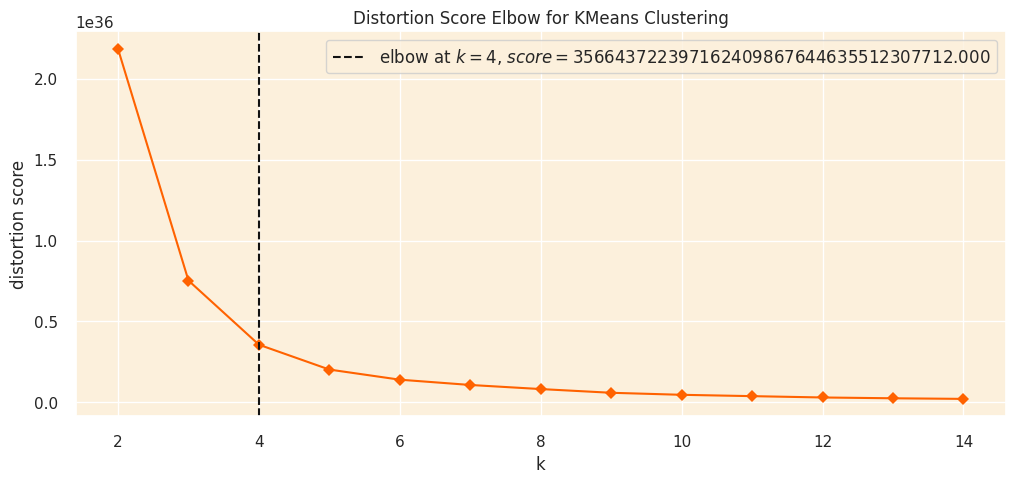

In [ ]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)


# Fit the data to the visualizer
visualizer.fit(new_df)

# Finalize and render the figure
visualizer.show();

## n_cluster tuning silhouette method

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(new_df)
    preds = kmeans.predict(new_df)

    score_euclidean = silhouette_score(new_df, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

<Axes: >

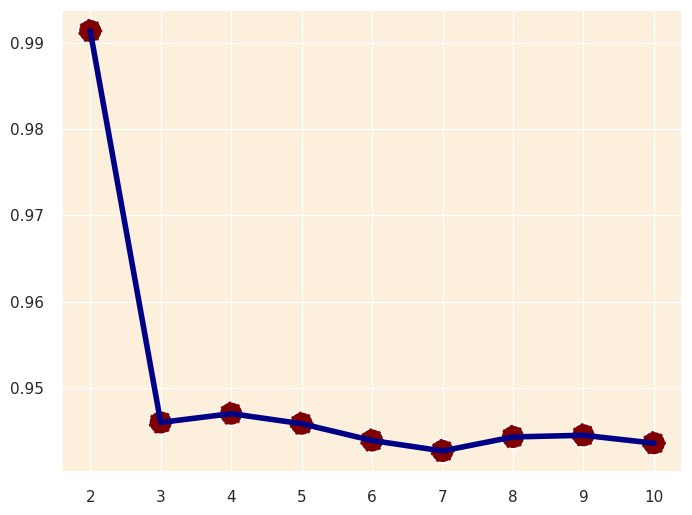

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

## Fit Kmeans Cluster Model and Create Cluster Plot

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=7).fit(new_df)
new_df['cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-95-5a3ebeaf9c86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = kmeans.labels_


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(new_df)
pcs = pca.transform(new_df)

pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
pca.head()

,pc1,pc2
0,-7.525187e+16,2.108646e+08
1,-7.525187e+16,2.397543e+08
2,-7.525187e+16,2.632213e+08
3,-7.525187e+16,2.554036e+08
4,-7.525187e+16,2.684145e+08


<ipython-input-97-dc67d4ff60e6>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='pc1', ylabel='pc2'>

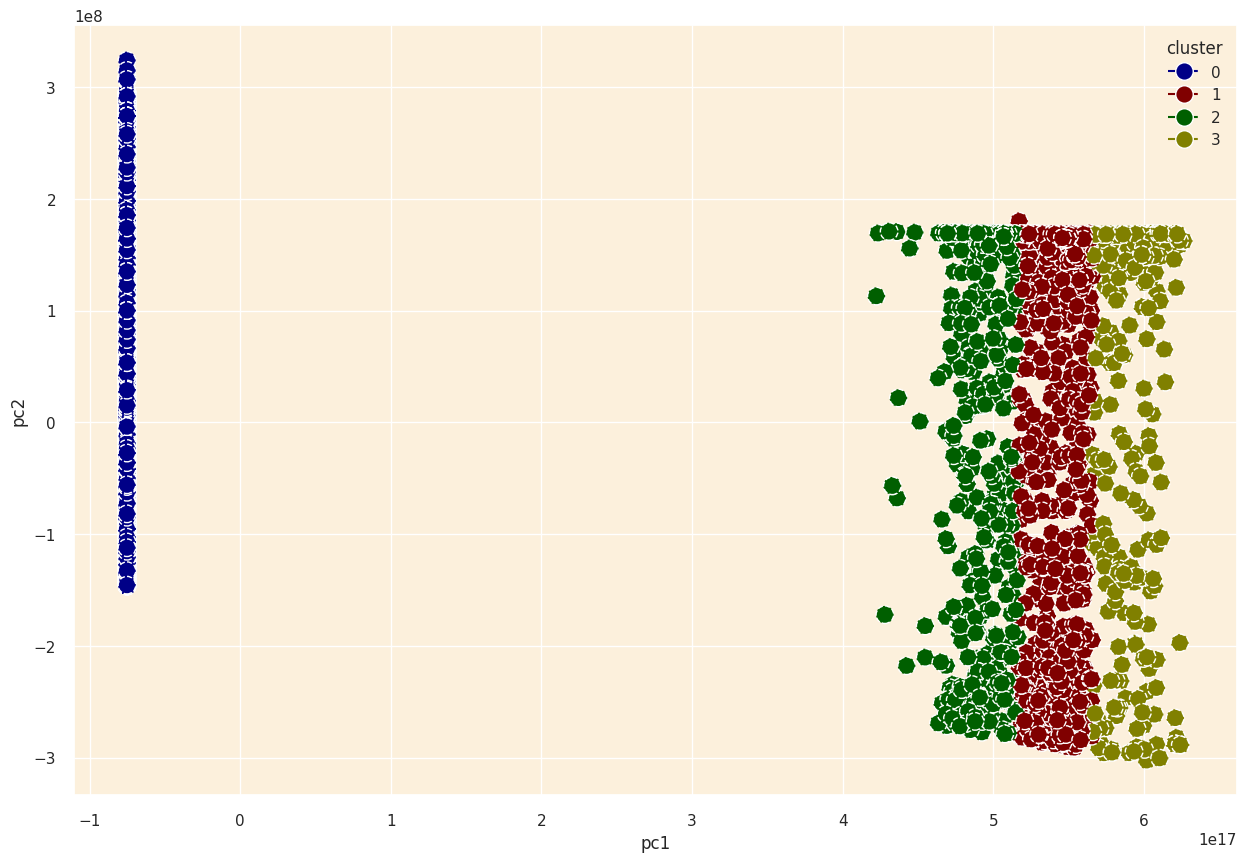

In [ ]:
pca['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="pc1", y="pc2",
    hue="cluster",
    edgecolor='white',
    linestyle='--',
    data=pca,
    palette=['#000087','#800000','#005f00',"#808000",'#808080'],
    s=160,
    ax=ax
)


In [ ]:
# Define a custom mode function
def mode(series):
    return series.mode().iloc[0]

# Calculate the centroids for each cluster
centroid_df = new_df.groupby('cluster')[['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toilets',
                                         'bedrooms', 'studios', 'checkin', 'checkout',
                                         'family_suitability', 'price_fix', 'safety',
                                         'natural_condition', 'work_suitability', 'id']].agg({
    'rating': 'mean',
    'reviews': 'mean',
    'bathrooms': 'median',
    'beds': 'median',
    'guests': 'median',
    'toilets': 'median',
    'bedrooms': 'median',
    'studios': 'median',
    'checkin': mode,
    'checkout': mode,
    'family_suitability': mode,
    'price_fix': 'median',
    'safety': 'median',
    'natural_condition': mode,
    'work_suitability': mode,
    'id': 'nunique'
}).reset_index()

# Rename the 'id' column to 'num_listings'
centroid_df = centroid_df.rename(columns={'id': 'num_listings'})

centroid_df

,cluster,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,family_suitability,price_fix,safety,natural_condition,work_suitability,num_listings
0,0,3.491420,40.702638,1.0,2.0,4.0,0.0,1.0,0.0,2,1,1,273.100,1.0,0,2,11222
1,1,1.635316,4.088608,1.0,2.0,4.0,0.0,1.0,0.0,2,1,1,245.630,1.0,0,2,790
2,2,1.685985,4.315488,1.0,2.0,4.0,0.0,1.0,0.0,2,1,1,262.100,1.0,0,2,523
3,3,0.961481,1.929630,1.0,2.0,5.0,0.0,2.0,0.0,2,1,1,275.385,2.0,0,2,270


## Apply K-Means Cluster Recommendation System

In [ ]:
new_df.head()

,id,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,host_id,country,family_suitability,price_fix,safety,natural_condition,work_suitability,cluster
0,49849504,4.71,64,1,1,2,0,2,0,3,2,357334205.0,108,2,269.27,1,3,1,0
1,50891766,0.00,0,2,2,4,0,2,0,2,1,386223873.0,108,1,155.50,1,0,2,0
2,50699164,4.85,68,1,3,4,0,1,0,2,2,409690853.0,33,2,199.70,2,1,2,0
3,49871422,5.00,13,1,2,4,0,1,0,2,2,401873242.0,108,0,377.97,3,2,1,0
4,51245886,0.00,0,1,1,2,0,1,0,2,2,414884116.0,108,1,222.43,1,0,2,0


In [ ]:
n = 40

# Randomly select n rows from df to create df_sample
df_sample_1 = new_df.sample(n=n, random_state=None).copy()
df_sample_1.head(10)

,id,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,host_id,country,family_suitability,price_fix,safety,natural_condition,work_suitability,cluster
7563,680696348207458574,0.00,0,2,6,12,0,4,0,3,1,471797520.0,43,2,50.13,2,3,2,3
6515,15920260,5.00,18,1,3,4,0,1,0,2,1,39115156.0,33,1,212.80,0,0,1,0
2137,36123656,4.89,64,1,1,2,0,1,0,2,2,231923992.0,106,1,165.13,3,1,2,0
4130,20775507,4.60,25,2,2,6,0,2,0,2,2,8642923.0,106,1,574.27,0,0,2,0
7938,32293270,0.00,0,1,2,6,0,1,0,2,1,228150833.0,104,1,388.13,3,0,2,0
12320,614176171796317617,4.67,9,2,2,5,0,2,0,1,1,281490117.0,43,1,449.23,1,0,2,1
3358,958062,4.92,27,3,8,11,0,4,0,0,0,5211563.0,48,1,989.07,2,0,2,0
5940,42595043,0.00,1,1,2,3,0,1,0,2,2,339137942.0,35,1,21170.77,1,0,2,0
10287,38038476,4.90,21,3,4,12,0,3,0,2,1,38887113.0,43,1,614.30,4,0,1,0
8882,45586615,0.00,2,1,3,4,0,1,0,2,1,349117830.0,48,1,264.63,1,0,0,0


In [ ]:


#Identify the Top 10 Best-Rated Listings in Each Cluster
best_rated_listings = new_df.groupby(['cluster', 'id']).agg({'rating': 'mean', 'reviews': 'sum'}).reset_index()
best_rated_listings = best_rated_listings.sort_values(by=['cluster', 'rating', 'reviews'], ascending=[True, False, False])
top_listings_per_cluster = best_rated_listings.groupby('cluster').head(10)

#Generate Recommendations for Each Listing in df_sample_1
recommendations = []

for i, row in df_sample_1.iterrows():
    # Get the cluster of the current sample listing
    cluster = row['cluster']

    # Get the top listings in the same cluster
    top_listings = top_listings_per_cluster[top_listings_per_cluster['cluster'] == cluster]

    # Find top 3 listings in the best-rated list that are not the current listing
    top_listings_not_current = top_listings[top_listings['id'] != row['id']]
    top_3_listings_not_current = top_listings_not_current.head(3)

    # Append the recommendations to the list
    for _, rec_row in top_3_listings_not_current.iterrows():
        recommendations.append([row['id'], cluster, rec_row['id'], rec_row['rating']])

#Create a DataFrame from the Recommendations List
recommendations_df = pd.DataFrame(recommendations, columns=['source_id', 'cluster', 'rec_id', 'rec_rating'])
df_recommendations = df_sample_1.merge(recommendations_df, left_on=['id', 'cluster'], right_on=['source_id', 'cluster'], how='right')


In [ ]:
df_recommendations_fix = df_recommendations.drop(columns=['source_id', 'rec_id'])

# Display 10 random rows from the df_sample_1_with_recommendations dataframe
df_recommendations_fix.sample(10, random_state=0)

,id,rating,reviews,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,host_id,country,family_suitability,price_fix,safety,natural_condition,work_suitability,cluster,rec_rating
48,49381266,4.64,95,1,0,2,0,1,0,2,0,398294739.0,34,1,222.93,1,0,1,0,5.0
94,570084193711104511,5.00,3,2,2,5,0,2,0,2,2,395574599.0,117,2,187.63,1,0,3,2,5.0
95,570084193711104511,5.00,3,2,2,5,0,2,0,2,2,395574599.0,117,2,187.63,1,0,3,2,5.0
8,36123656,4.89,64,1,1,2,0,1,0,2,2,231923992.0,106,1,165.13,3,1,2,0,5.0
97,52931942,4.56,9,3,3,9,0,3,0,2,1,118408319.0,43,2,114.00,4,0,2,0,5.0
22,42595043,0.00,1,1,2,3,0,1,0,2,2,339137942.0,35,1,21170.77,1,0,2,0,5.0
7,36123656,4.89,64,1,1,2,0,1,0,2,2,231923992.0,106,1,165.13,3,1,2,0,5.0
10,20775507,4.60,25,2,2,6,0,2,0,2,2,8642923.0,106,1,574.27,0,0,2,0,5.0
45,21269349,0.00,2,1,2,4,0,1,0,2,1,10654285.0,104,2,427.73,2,0,3,0,5.0
89,51109423,0.00,0,1,1,1,0,1,0,3,1,413568988.0,14,1,85.73,3,0,3,0,5.0
